In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import dirichlet
import attila_utils
#plt.rcParams['figure.dpi'] = 200

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
group2condition = {
    'A': 'WT',
    'B': '5xFAD',
    'C': '5xFAD + Amiloride',
}

In [3]:
fpath = '../../resources/QPS/5xFAD-mouse/amiloride-behavioral-data-cleaned.xlsx'
mwm = pd.read_excel(fpath, sheet_name='rawdata MWM day 1-4', header=[0,1], index_col=None)
mwm = pd.DataFrame(mwm.iloc[:, 4:].to_numpy(), columns=mwm.iloc[:, 4:].columns, index=pd.MultiIndex.from_frame(mwm.iloc[:, :4].xs('Covariates', axis=1, level=0)))
mwm = mwm.stack(level=1)
mwm = mwm.rename_axis(mwm.index.names[:-1] + ['Day'], axis=0)
mwm = pd.concat([mwm, mwm.index.to_frame()], axis=1)
mwm['Day'] = mwm.Day.str.replace('Day ', '').astype(pd.Int64Dtype())
mwm['Condition'] = mwm.Group.apply(lambda x: group2condition[x])
mwm

Distance (m)  Floating %  Latency (s)  \
Cohort Group Sex IRN     Day                                            
I      A     f   12913 A Day 1     10.841028    0.532622        60.08   
                         Day 2      5.720320    7.641773        26.06   
                         Day 3      3.967948    9.397345        22.70   
                         Day 4      2.178462    6.630220        18.06   
                 12915 A Day 1      8.892240    4.043839        47.62   
...                                      ...         ...          ...   
III    C     m   13958 A Day 4      3.717858    7.993118        20.74   
                 13962 A Day 1     10.552825    1.930759        60.08   
                         Day 2      9.089775    0.798936        60.08   
                         Day 3      3.030865    7.857635        19.78   
                         Day 4      6.122248    4.698587        33.14   

                                Thigmotaxis %  Velocity (m/s) Cohort Group  \
Cohort Group Sex IRN     Day                                                 
I      A     f   12913 A Day 1      66.311600        0.180684      I     A   
                         Day 2      33.259165        0.202247      I     A   
                         Day 3      16.170368        0.166473      I     A   
                         Day 4       7.830300        0.120461      I     A   
                 12915 A Day 1      70.582225        0.182376      I     A   
...                                       ...             ...    ...   ...   
III    C     m   13958 A Day 4      32.184900        0.165693    III     C   
                 13962 A Day 1      44.906775        0.175880    III     C   
                         Day 2      18.708375        0.151496    III     C   
                         Day 3      15.243320        0.154832    III     C   
                         Day 4      25.740050        0.176833    III     C   

                               Sex      IRN  Day          Condition  
Cohort Group Sex IRN     Day                                         
I      A     f   12913 A Day 1   f  12913 A    1                 WT  
                         Day 2   f  12913 A    2                 WT  
                         Day 3   f  12913 A    3                 WT  
                         Day 4   f  12913 A    4                 WT  
                 12915 A Day 1   f  12915 A    1                 WT  
...                             ..      ...  ...                ...  
III    C     m   13958 A Day 4   m  13958 A    4  5xFAD + Amiloride  
                 13962 A Day 1   m  13962 A    1  5xFAD + Amiloride  
                         Day 2   m  13962 A    2  5xFAD + Amiloride  
                         Day 3   m  13962 A    3  5xFAD + Amiloride  
                         Day 4   m  13962 A    4  5xFAD + Amiloride  

[172 rows x 11 columns]

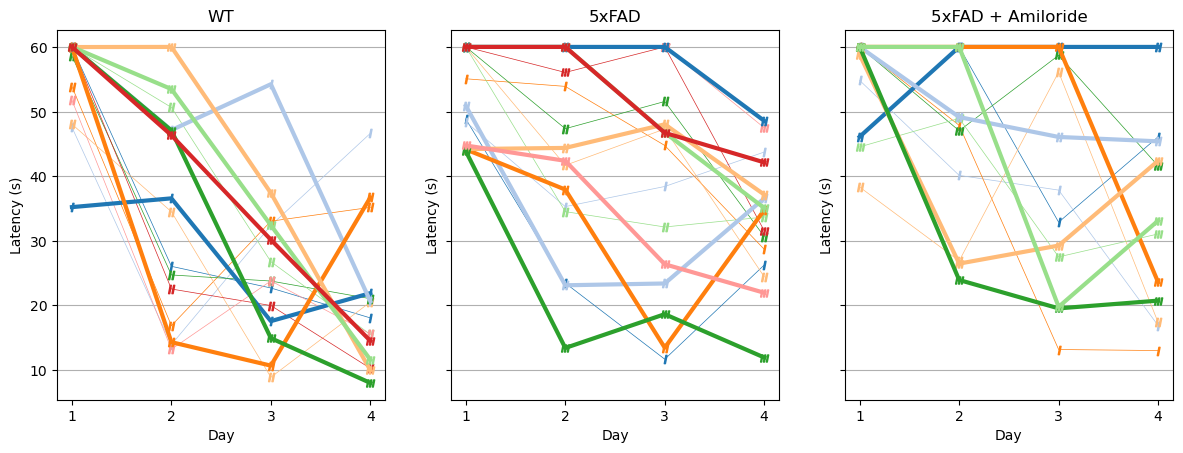

In [4]:
def data_plotter(yname='Latency (s)', mwm=mwm):
    fig, ax = plt.subplots(1, len(mwm.Group.unique()), sharey=True, figsize=(3 * 4.8, 4.8))
    for group, axi in zip(mwm.Group.unique(), ax):
        axi.set_title(group2condition[group])
        axi.set_ylabel(yname)
        axi.set_xlabel('Day')
        axi.set_xticks(range(5))
        axi.set_xticklabels(range(5))
        axi.grid(axis='y')
        df1 = mwm.xs(group, level=1)
        for sex, linewidth in zip(df1.Sex.unique(), [0.5, 3]):
            df2 = df1.xs(sex, level=1)
            for irn, color in zip(df2.IRN.unique(), plt.color_sequences['tab20'][:len(df2.IRN.unique())]):
                df3 = df2.xs(irn, level=1)
                for cohort in df3.Cohort.unique():
                    s = sex + cohort
                    y = df3[yname]
                    x = df3.Day
                    axi.plot(x, y, color=color, label=irn, marker='$' + cohort + '$', linewidth=linewidth)
                pass
            pass
        #axi.legend()
    return((fig, ax))

fig, ax = data_plotter(yname='Latency (s)')

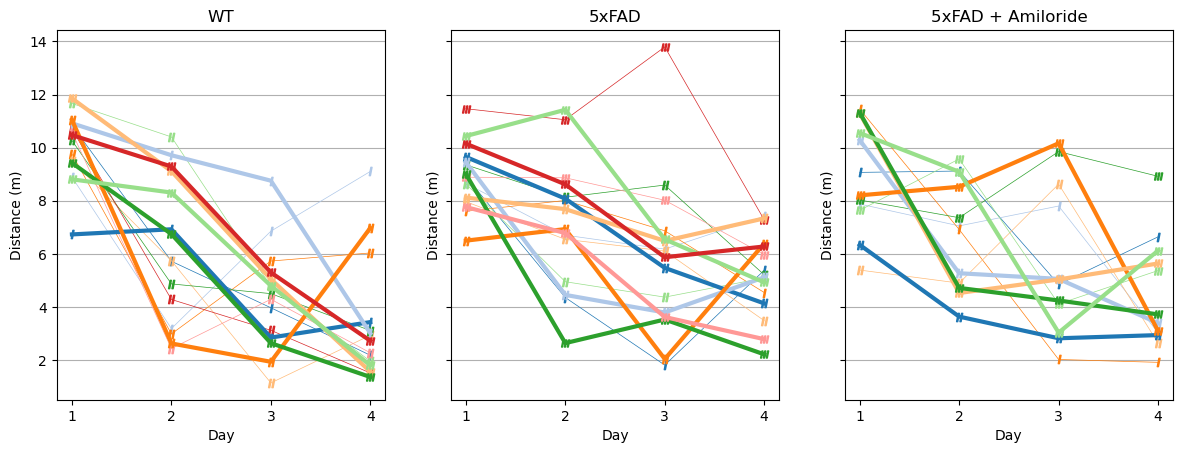

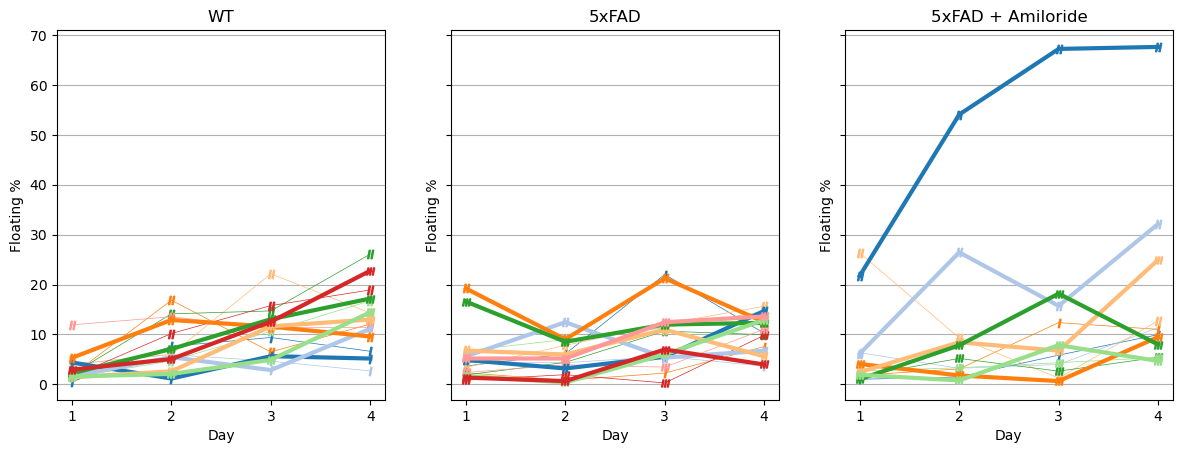

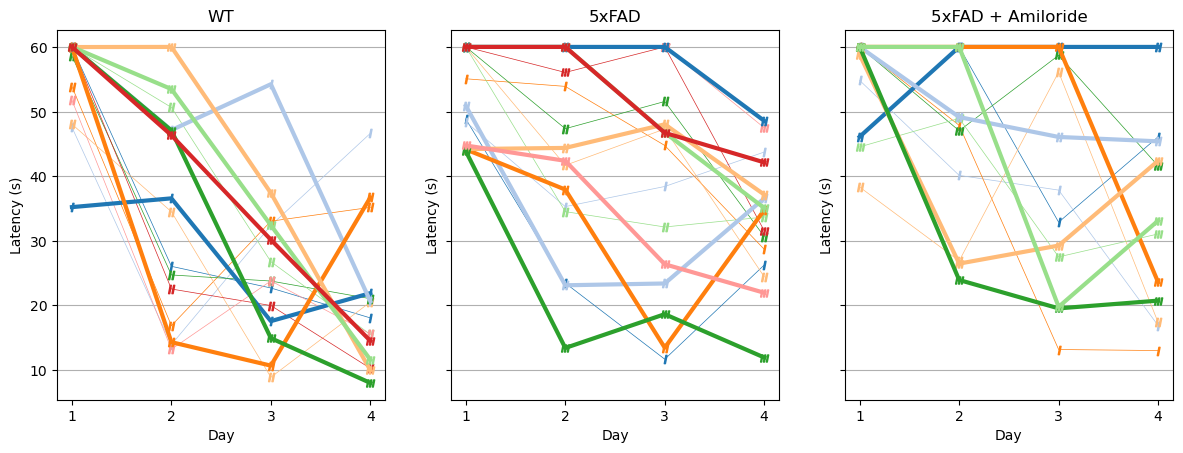

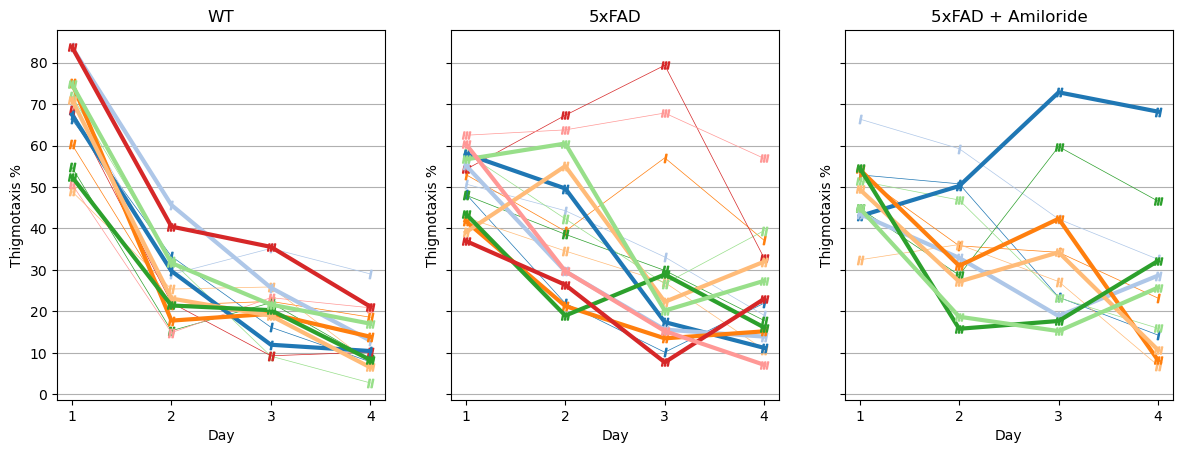

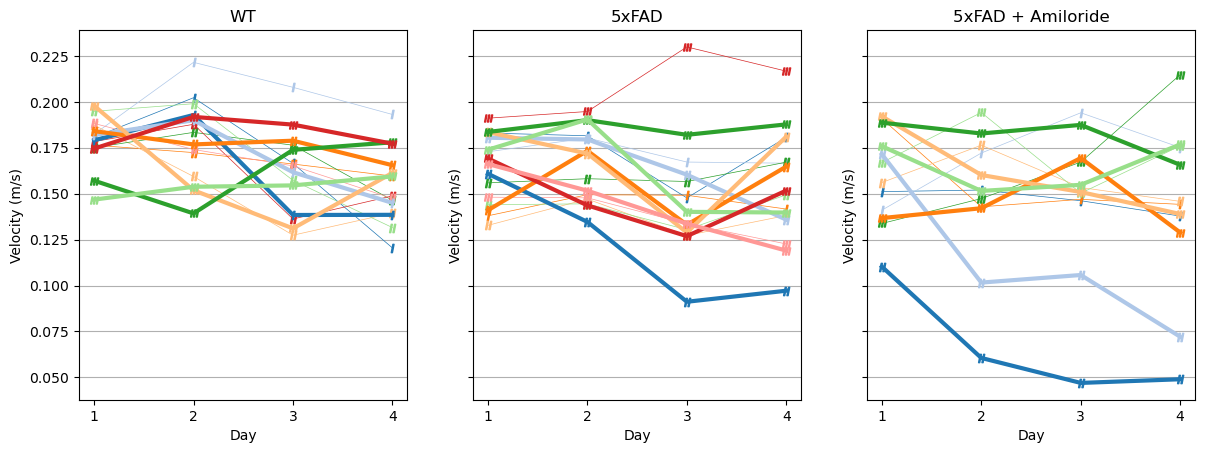

In [5]:
for yname in mwm.loc[:, :'Velocity (m/s)'].columns:
    fig, ax = data_plotter(yname=yname)
    attila_utils.savefig(fig, 'training-' + re.sub('[ ()%/]+', '-', yname).strip('-'))

In [6]:
fpath = '../../resources/QPS/5xFAD-mouse/amiloride-behavioral-data-cleaned.xlsx'
mwm5 = pd.read_excel(fpath, sheet_name='rawdata MWM day 5', index_col=None)
mwm5['Condition'] = mwm5.Group.apply(lambda x: group2condition[x])
mwm5

,Cohort,Group,Sex,IRN,Target Zone Crossings,SE (%),NE (%),NW (%),SW (%),Condition
0,I,A,f,12913 A,2,18.90810,60.31960,5.19308,15.57920,WT
1,I,A,f,12915 A,2,25.56590,19.30760,28.09590,27.03060,WT
2,II,A,f,12937 A,2,20.90550,50.19970,10.78560,18.10920,WT
3,II,A,f,12955 A,1,20.10650,21.30490,33.28890,25.29960,WT
4,II,A,f,12957 A,1,44.60720,16.24500,5.72570,33.42210,WT
5,II,A,f,12961 A,5,11.85090,62.31690,9.45406,16.37820,WT
6,II,A,f,12967 A,3,8.38881,37.01730,35.68580,18.90810,WT
7,II,A,f,12979 A,4,15.57920,47.13720,30.49270,6.79095,WT
8,I,A,m,14138,3,14.78030,44.20770,26.23170,14.78030,WT
9,I,A,m,14142,6,8.65513,66.57790,20.63910,4.12783,WT


Text(0, 0.5, 'Fraction of time in target quadrant')

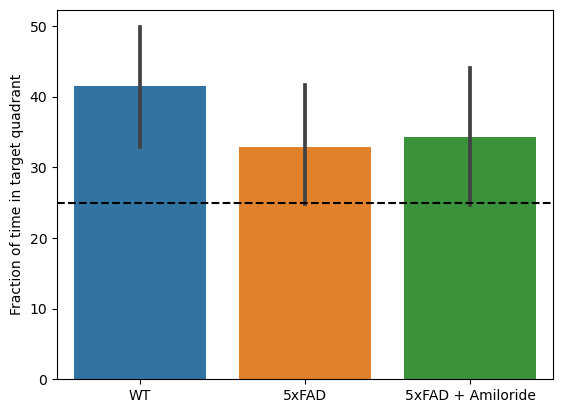

In [7]:
fig, ax = plt.subplots()
sns.barplot(x='Condition', y='NE (%)', data=mwm5, ax=ax)
ax.axhline(25, linestyle='dashed', color='k')
ax.set_xlabel('')
ax.set_ylabel('Fraction of time in target quadrant')

In [8]:
def extract_data4dirichlet(group, mwm5=mwm5):
    a = mwm5.loc[mwm5.Group == group, 'SE (%)':'SW (%)'].to_numpy()[:, [1, 2, 3, 0]]
    return(a)

In [9]:
def my_dirichlet_plot(group, do_test_uniform=True, mwm5=mwm5, group2condition=group2condition):
    a = extract_data4dirichlet(group, mwm5=mwm5)
    dirichlet.plot(a, label=group2condition[group], do_test_uniform=do_test_uniform, do_MWM_correction=True, verbose=True, save_figure='named-figure/dirichlet-plot-group-' + group + '.png')


Result of the Dirichlet uniformity test for group WT:
# likelihood-ratio statistic (with MWM correction) = 14.3535
# p-value = 0.00246142
# MLE params under null hypothesis (uniformity)           :[2.02991233 2.02991233 2.02991233 2.02991233]
# MLE params under alternative hypothesis                 :[4.53177868 2.37172061 2.34260994 2.26527786]


/Users/jonesa7/tools/dirichlet.py:146: RuntimeWarning: divide by zero encountered in log
  logp = log(D).mean(axis=0)
/Users/jonesa7/tools/dirichlet.py:404: RuntimeWarning: invalid value encountered in double_scalars
  s1 = s0 * exp(-g/(s0*h + g)) # Newton on log s



Result of the Dirichlet uniformity test for group 5xFAD + Amiloride:
# likelihood-ratio statistic (with MWM correction) = 3.68336
# p-value = 0.297748
# MLE params under null hypothesis (uniformity)           :[1.787041 1.787041 1.787041 1.787041]
# MLE params under alternative hypothesis                 :[2.61028068 1.93986022 1.89460516 1.56812866]


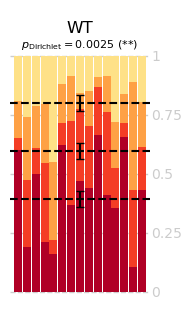

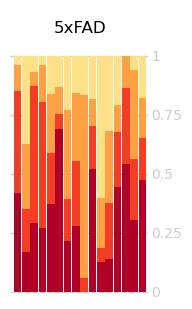

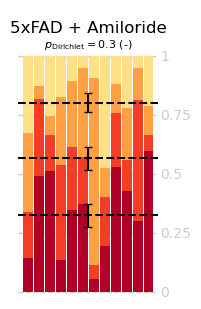

In [10]:
for group in mwm5.Group.unique():
    try:
        my_dirichlet_plot(group, do_test_uniform=True)
    except:
        my_dirichlet_plot(group, do_test_uniform=False)

In [11]:
%connect_info

{
  "shell_port": 55515,
  "iopub_port": 55516,
  "stdin_port": 55517,
  "control_port": 55519,
  "hb_port": 55518,
  "ip": "127.0.0.1",
  "key": "c3db9b45-987006ce60b8600f264a375f",
  "transport": "tcp",
  "signature_scheme": "hmac-sha256",
  "kernel_name": "python3"
}

Paste the above JSON into a file, and connect with:
    $> jupyter <app> --existing <file>
or, if you are local, you can connect with just:
    $> jupyter <app> --existing kernel-676909ae-3dd3-40dd-8a7a-99030bcfd09b.json
or even just:
    $> jupyter <app> --existing
if this is the most recent Jupyter kernel you have started.
